In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df_train=pd.read_excel('C:/Users/Chinmay Maganur/Downloads/Data_Train.xlsx')



In [3]:
df_test=pd.read_excel('C:/Users/Chinmay Maganur/Downloads/Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [6]:
df_train['Airline'].nunique()

12

In [7]:
df_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train.dropna(inplace=True)

In [10]:
df_train['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'])
df_train['Day_of_Journey']=(df_train['Date_of_Journey']).dt.day
df_train['Month_of_Journey']=(df_train['Date_of_Journey']).dt.month

In [11]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [12]:
#Dep_time 
df_train['Dep_hr']=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute

In [13]:
#Arrival_time
df_train['Arrival_hr']=pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_min']=pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [14]:
#Splitting duration  time

a=df_train['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_train['dur_hr']=a[0].apply(lambda x: x[:-1])
df_train['dur_min']=a[1].apply(lambda x: x[:-1])


In [15]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [16]:
#dropping the data
df_train.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [17]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

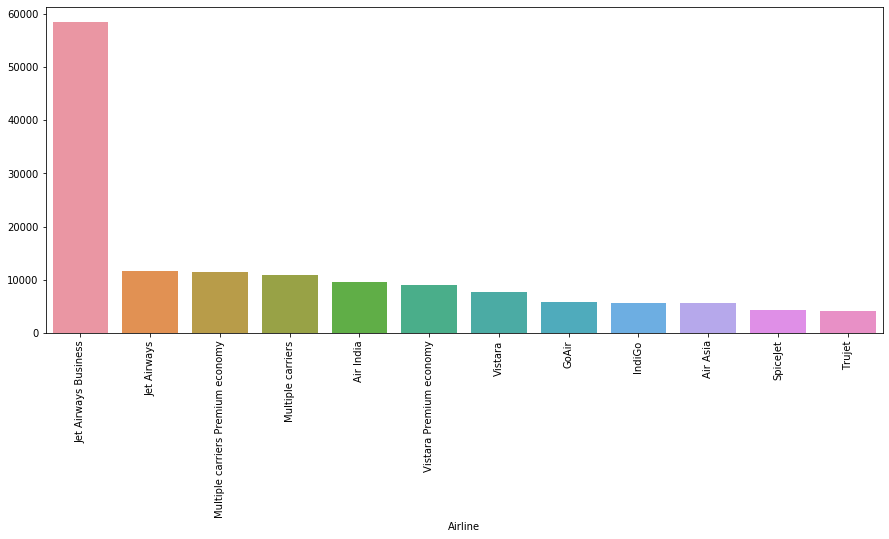

In [18]:
air_price=df_train.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(air_price.index,air_price.values)
plt.xticks(rotation=90)
#Jet airways have higher  mean prices
#Trujetand spice jet with  the lowest, maybe its because the number of flights operating, let us check

In [19]:
#No of flights operating

p=df_train['Airline'].value_counts()
p

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

([<matplotlib.patches.Wedge at 0x8ce3e5d4a8>,
 [Text(0.4673382969373547, 0.9957885901212632, 'Jet Airways'),
  Text(-1.0590228682786953, 0.2974400182604306, 'IndiGo'),
  Text(-0.7301424472999118, -0.8227344691034256, 'Air India'),
  Text(0.15445010247657304, -1.0891029179306133, 'Multiple carriers'),
  Text(0.736171915795146, -0.8173438140675592, 'SpiceJet'),
  Text(0.9875298522267969, -0.48454596372369146, 'Vistara'),
  Text(1.0731359530911666, -0.24161793431596462, 'Air Asia'),
  Text(1.0972609559319872, -0.0775783126087553, 'GoAir'),
  Text(1.0999481941968114, -0.010675677176360506, 'Multiple carriers Premium economy'),
  Text(1.0999906759441507, -0.004529109838652445, 'Jet Airways Business'),
  Text(1.0999988107446137, -0.0016175167497391636, 'Vistara Premium economy'),
  Text(1.099999952439457, -0.00032347054347071794, 'Trujet')],
 [Text(0.25491179832946614, 0.5431574127934162, '36.0%'),
  Text(-0.5776488372429247, 0.16224000996023485, '19.2%'),
  Text(-0.39825951670904275, -0.448

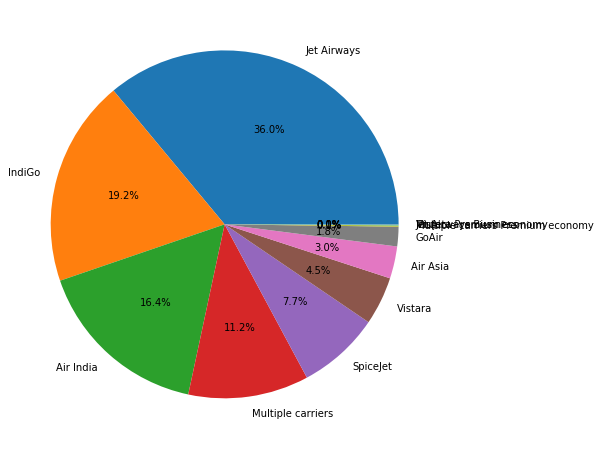

In [20]:
plt.figure(figsize=(8,8))
plt.pie(p.values, labels=p.index,autopct='%1.1f%%')
#jet flights has more flights operating,  followed by indigo,airindia,and trujet,jetairways,multiple carriers premium economy has very less flights operaring

In [21]:
df_train[(df_train['Source']=='Banglore') & (df_train['Destination']=='New Delhi')]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
21,Air India,Banglore,New Delhi,BLR → COK → DEL,1 stop,No info,6955,21,3,22,0,13,20,15,20
38,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,19225,3,6,7,0,13,15,6,15
41,Air India,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,8714,15,3,6,45,15,15,8,30
45,SpiceJet,Banglore,New Delhi,BLR → DEL,non-stop,No check-in baggage included,3527,24,3,5,45,8,35,2,50
52,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,4377,24,3,22,20,1,10,2,50


In [22]:
#price based on number of stops

df_train.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

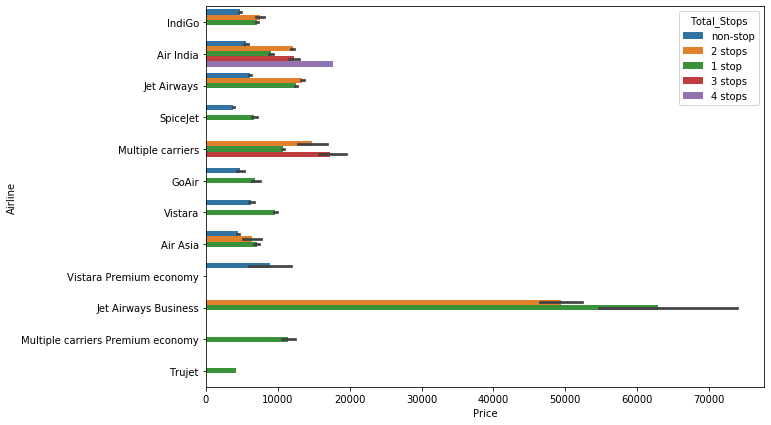

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(y=df_train['Airline'],x=df_train['Price'],hue=df_train['Total_Stops'])

In [24]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [25]:
#Handling Categorical Values 
df_train['Total_Stops']=df_train['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
dum_airine=pd.get_dummies(df_train['Airline'],drop_first=True)
print(df_train['Source'].value_counts())
print(df_train['Destination'].value_counts())

dum_src_dest=pd.get_dummies(df_train[['Source','Destination']],drop_first=True)
df_train=pd.concat([dum_airine,dum_src_dest,df_train],axis=1)
df_train.drop(['Airline','Source','Destination'],inplace=True,axis=1)

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [26]:
#TEST DATA

In [27]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

dum_airine=pd.get_dummies(df_test['Airline'],drop_first=True)
dum_src_dest=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)

In [28]:
df_test=pd.concat([dum_airine,dum_src_dest,df_test],axis=1)
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [29]:
print('train_shape',df_train.shape)
print('test_shape',df_test.shape)

train_shape (10682, 32)
test_shape (2671, 28)


In [30]:
df_train.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Route', 'Total_Stops', 'Additional_Info',
       'Price', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min',
       'Arrival_hr', 'Arrival_min', 'dur_hr', 'dur_min'],
      dtype='object')

In [31]:
x=df_train.loc[:,['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops',  'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'dur_hr', 'dur_min']]
y=df_train['Price']


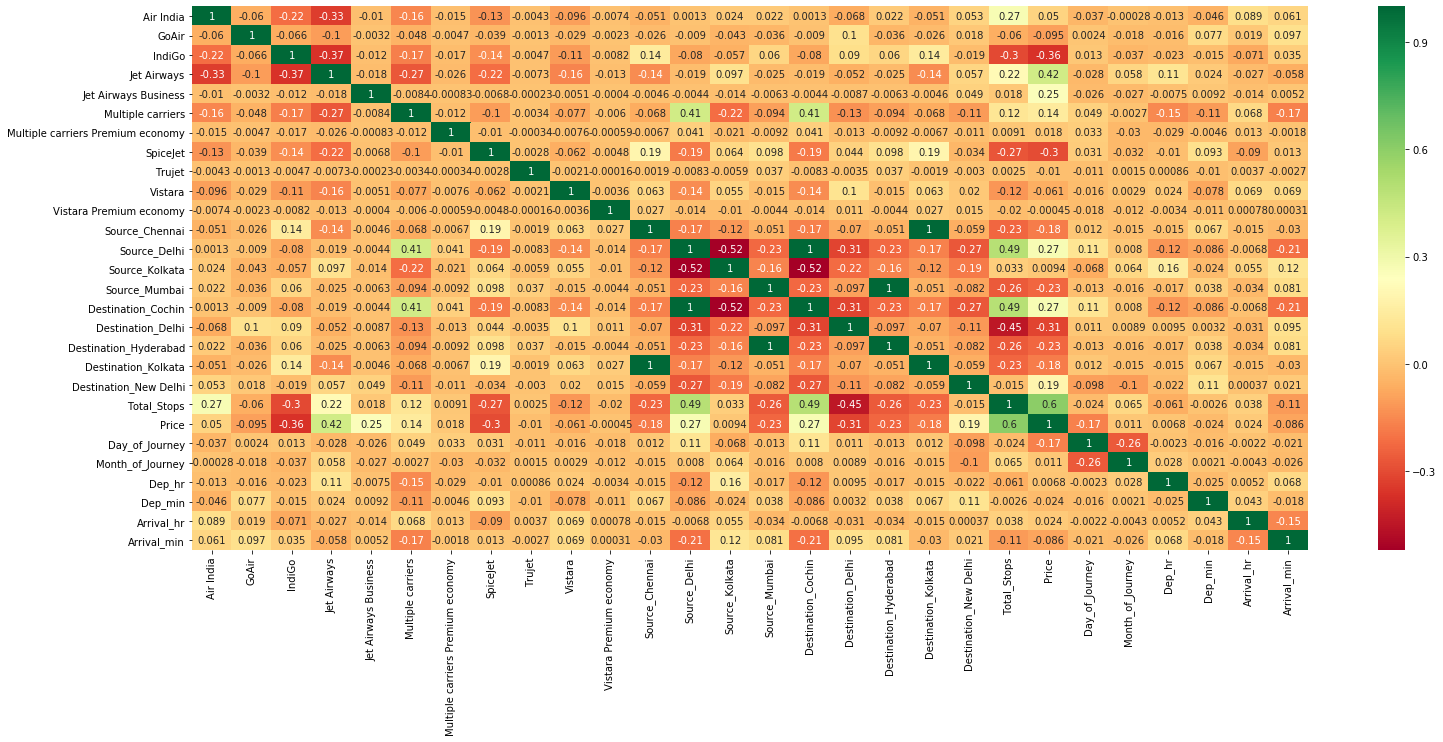

In [32]:
plt.figure(figsize=(25,10))
sns.heatmap(df_train.corr(),cmap='RdYlGn',annot=True)

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

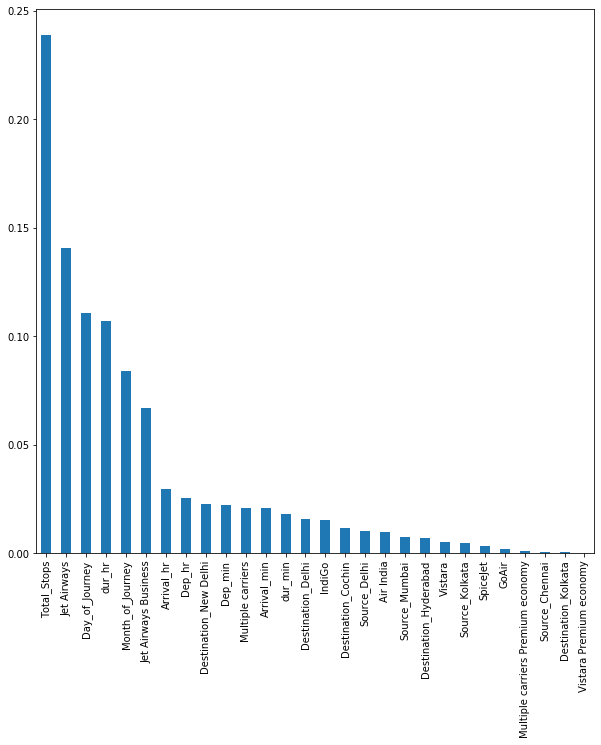

In [34]:
pd.Series(ext.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(10,10))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 22)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred=rf.predict(x_test)


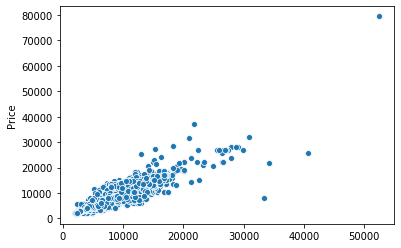

In [36]:
sns.scatterplot(pred,y_test)

0.8073069952111749


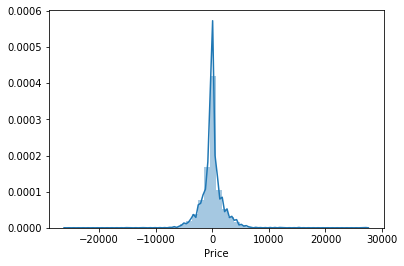

In [37]:
from sklearn.metrics import r2_score
sns.distplot(y_test-pred)
print(r2_score(y_test,pred))

In [38]:
#hypeparametre tuning

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [39]:
rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_rs=RandomForestRegressor()

rv=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)


In [40]:
rv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [41]:
rv.best_params_

{'n_estimators': 590,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 26}

0.8262404171780215


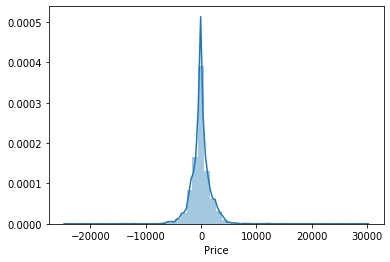

In [42]:
pred=rv.predict(x_test)
sns.distplot(y_test-pred)
print(r2_score(y_test,pred))

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))

MAE 1166.9952537768372
MSE 3470426.8673575046


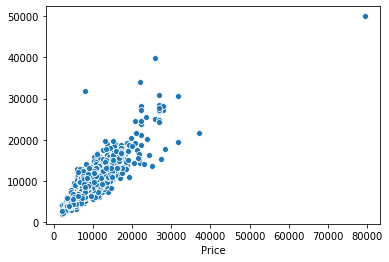

In [44]:
sns.scatterplot(y_test,pred)

In [45]:
import xgboost as xgb

In [46]:
xg=xgb.XGBRegressor()


In [47]:
x_train[['dur_hr','dur_min']]=x_train[['dur_hr','dur_min']].astype(int)
x_test[['dur_hr','dur_min']]=x_test[['dur_hr','dur_min']].astype(int)

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [48]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [49]:
pred=xg.predict(x_test)

0.8441495021556908
MAE 1159.6049220806724
MSE 3112736.2659708257


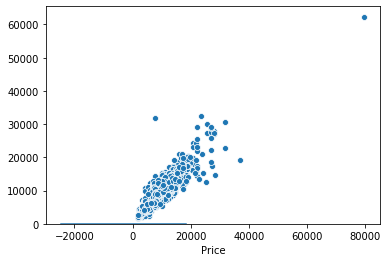

In [50]:
print(r2_score(y_test,pred))
sns.distplot(y_test-pred)
sns.scatterplot(y_test,pred)
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))

In [51]:
import pickle

In [60]:
file=open('flight_rf','wb')
pickle.dump(rv,file)

In [62]:
#read
model=open('flight_rf','rb')
rf_forest=pickle.load(model)

In [63]:
rf_forest.predict(x_test)

array([ 5477.40939815, 10614.50568947, 13000.80371015, ...,
       27267.56260714, 13117.99705414,  6347.71575631])

In [64]:
r2_score(y_test,rf_forest.predict(x_test))

0.8262404171780215